In [25]:
import pandas as pd
from RoutePlanner.CellGrid import CellGrid
from matplotlib import pyplot as plt
import xarray as xr
import netCDF4 as nc
import datetime
from RoutePlanner.TemporalCellGrid import TemporalCellGrid
import matplotlib.pyplot as plt
from RoutePlanner.CellBox import CellBox

In [26]:
sose = nc.Dataset("data/SOSE_surface_velocity_6yearMean_2005-2010.nc")

currentPoints = pd.DataFrame({'long': sose['lon'][...].data.flatten(),
                                'lat': sose['lat'][...].data.flatten(),
                                'uC': sose['uC'][...].data.flatten(),
                                'vC': sose['vC'][...].data.flatten()})

currentPoints['time'] = ''
currentPoints['uC'] = currentPoints['uC'] * 3.6
currentPoints['vC'] = currentPoints['vC'] * 3.6
currentPoints['long'] = currentPoints['long'].apply(lambda x: x if x <= 180 else x - 360)

print(currentPoints)

            long        lat        uC        vC time
0       0.083333 -77.874969       NaN       NaN     
1       0.250000 -77.874969       NaN       NaN     
2       0.416667 -77.874969       NaN       NaN     
3       0.583333 -77.874969       NaN       NaN     
4       0.750000 -77.874969       NaN       NaN     
...          ...        ...       ...       ...  ...
691195 -0.750000 -24.708300  0.002377 -0.122380     
691196 -0.583313 -24.708300  0.002553 -0.119374     
691197 -0.416656 -24.708300  0.002715 -0.116243     
691198 -0.250000 -24.708300  0.002877 -0.112676     
691199 -0.083313 -24.708300  0.002877 -0.108961     

[691200 rows x 5 columns]


In [11]:
modis_ips = pd.read_csv('/Users/jsmith/Downloads/Modis_1km.csv')
modis_ips = modis_ips.rename(columns ={'0':'long', '1':'lat', '2':'time', '3':'iceArea', '4':'cloud'})
modis_ips['iceArea'] = modis_ips['iceArea'] * 0.1

modis_ips = modis_ips[modis_ips.cloud != 1]
print(modis_ips)

          Unnamed: 0       long        lat        time  iceArea  cloud
155              155 -63.639404 -59.998535  19-02-2017      0.5      0
177              177 -63.446045 -59.998535  19-02-2017      0.5      0
178              178 -63.437256 -59.998535  19-02-2017      0.5      0
180              180 -63.419678 -59.998535  19-02-2017      0.5      0
181              181 -63.410889 -59.998535  19-02-2017      0.6      0
...              ...        ...        ...         ...      ...    ...
14243203    14243203 -10.043701 -79.993652  19-02-2017      0.5      0
14243204    14243204 -10.034912 -79.993652  19-02-2017      0.5      0
14243205    14243205 -10.026123 -79.993652  19-02-2017      0.5      0
14243206    14243206 -10.017334 -79.993652  19-02-2017      0.5      0
14243207    14243207 -10.008545 -79.993652  19-02-2017      0.4      0

[8449828 rows x 6 columns]


In [27]:
latMin = -80
latMax = -60
longMin = -65
longMax = -10

cellWidth = 1
cellHeight = .5

modis_grid = CellGrid(longMin, longMax, latMin, latMax, cellWidth, cellHeight, j_grid=True)
modis_grid.addIcePoints(modis_ips)
modis_grid.addCurrentPoints(currentPoints)

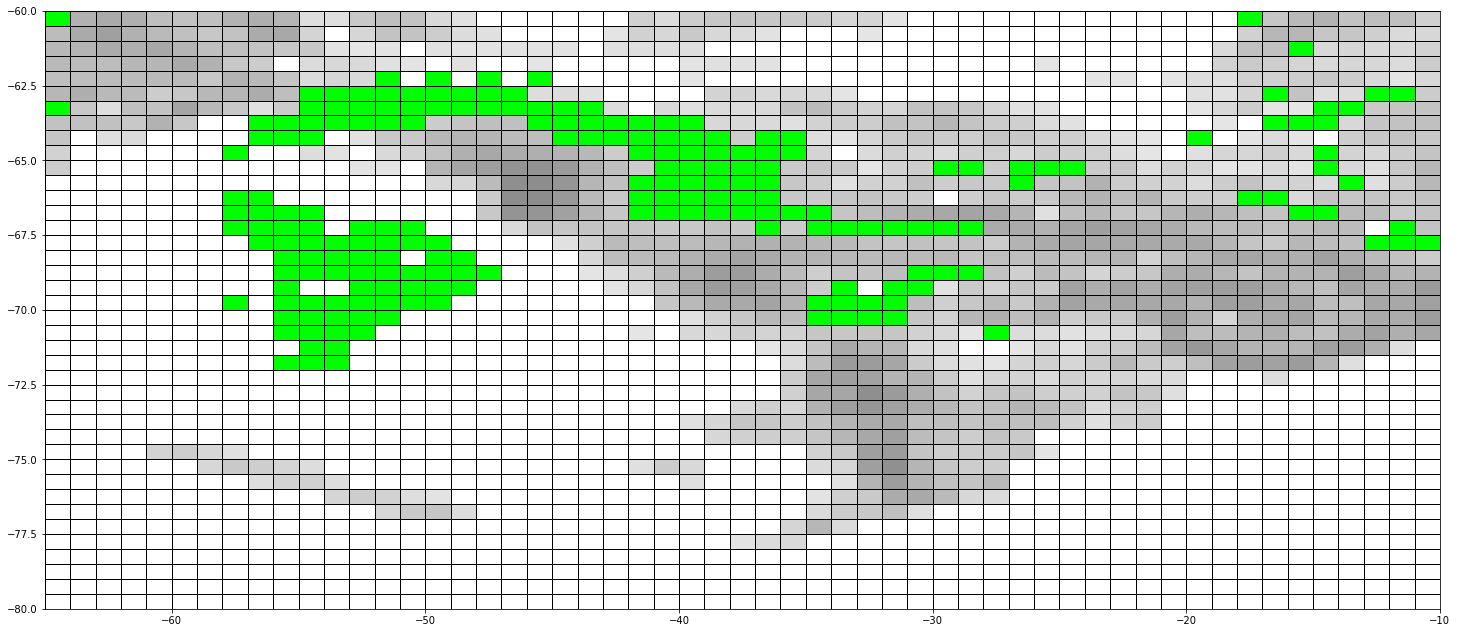

In [28]:
modis_grid.plot()

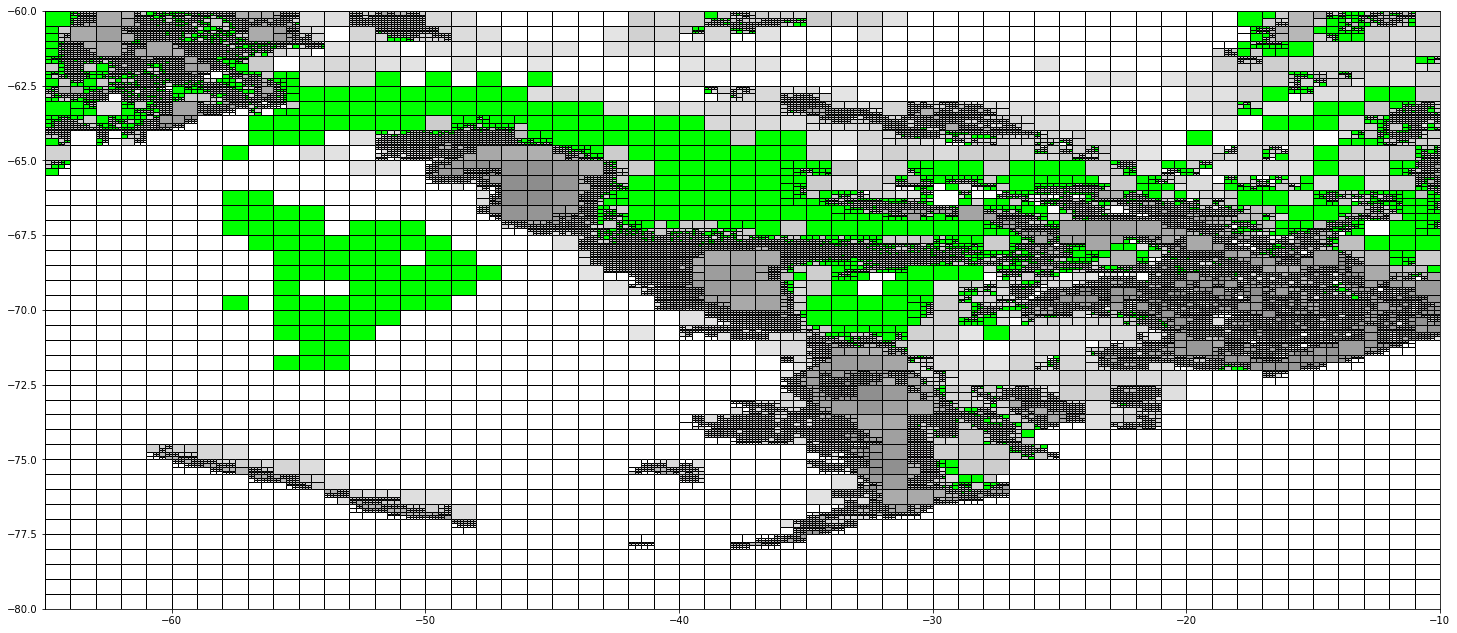

In [29]:
modis_grid.iterativeSplit(3)
modis_grid.plot()

In [19]:
OptInfo = {}

# Mesh Information
OptInfo['Mesh']  = {}
OptInfo['Mesh']['Longitude Bounds (Min,Max,Width)']      = [-130,25,5]
OptInfo['Mesh']['Latitude Bounds (Min,Max,Width)']       = [-80,-40,2.5]

OptInfo['Mesh']['Date Range (Min,Max,dT)']               = ['2016-01-1','2016-02-1',1.0]
OptInfo['Mesh']['Homogenous Params (Threshold,Min,Max)'] = [0.12,0.05,0.85] #[0.04,0.05,0.85] - Slow Vehicle, [0.12,0.05,0.85] - SDA
OptInfo['Mesh']['Current Data Path']                     = "../../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc"
OptInfo['Mesh']['Ice Data Path']                         = "../../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc"

# Route Information
OptInfo['Route'] = {} 
OptInfo['Route']['WayPoints']            = 'ModisWaypoints.csv'
OptInfo['Route']['MaxIceExtent']         = 0.8
OptInfo['Route']['Zero Currents']        = False
OptInfo['Route']['VariableSpeed']        = False
OptInfo['Route']['Time Unit']            = 'days'

OptInfo['Route']['VehicleInfo']                = {}
OptInfo['Route']['VehicleInfo']['Speed']       = 26.5
OptInfo['Route']['VehicleInfo']['Unit']        = 'km/hr'
OptInfo['Route']['VehicleInfo']['Beam']        = 24.0
OptInfo['Route']['VehicleInfo']['HullType']    = 'slender'
OptInfo['Route']['VehicleInfo']['ForceLimit']  = 96634.5




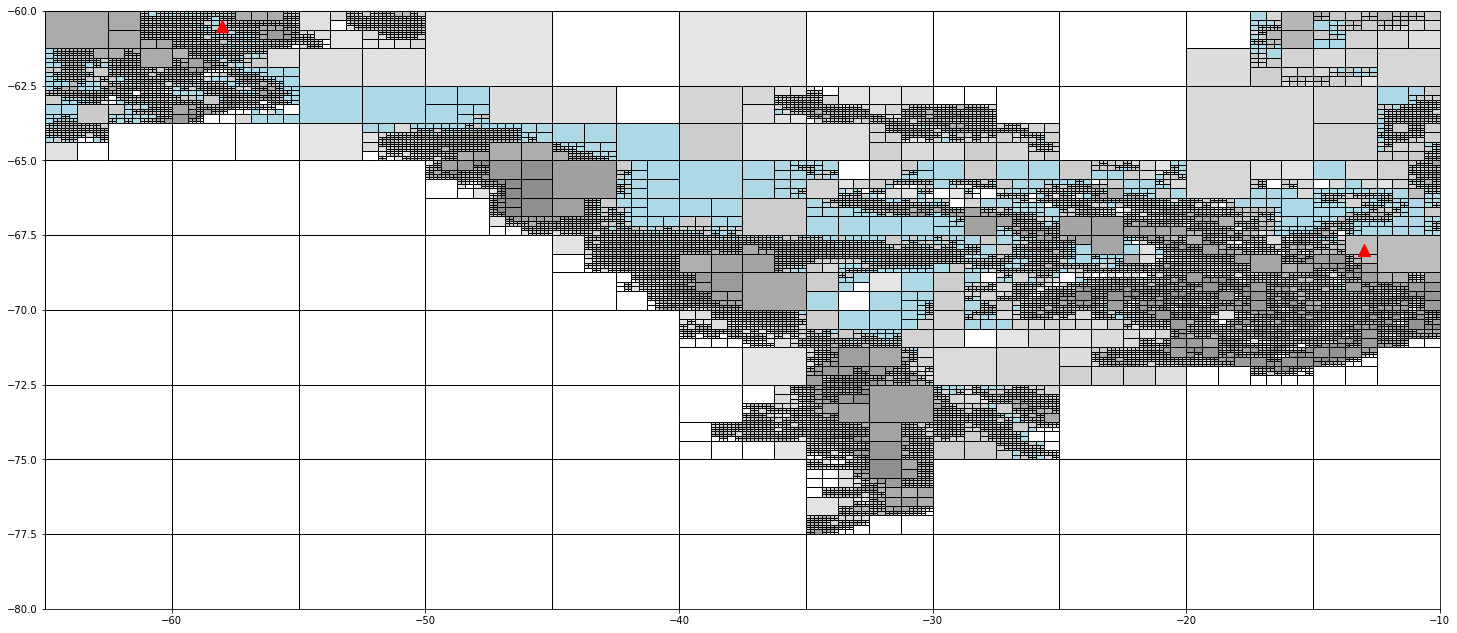

In [20]:
modis_grid.plot(waypoints=pd.read_csv(OptInfo['Route']['WayPoints'] ))

In [21]:
from RoutePlanner.Optimisation import TravelTime
TT = TravelTime(modis_grid,OptInfo)
Paths = TT.Paths(verbose=True,multiprocessing=False)

/Users/jsmith/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/jsmith/miniconda3/lib/python3.9/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


=== Processing Waypoint = WP1 ===
=== Processing Waypoint = WP2 ===


/Users/jsmith/Documents/Research/Researcher_BAS/RoutePlanning/SDADT-pyRoutePlanner/RoutePlanner/Optimisation.py:179: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Path['Path']['CaseTypes']   = np.array([wpt_a_index] + Graph['pathPoints'].loc[wpt_b_index] + [wpt_b_index])


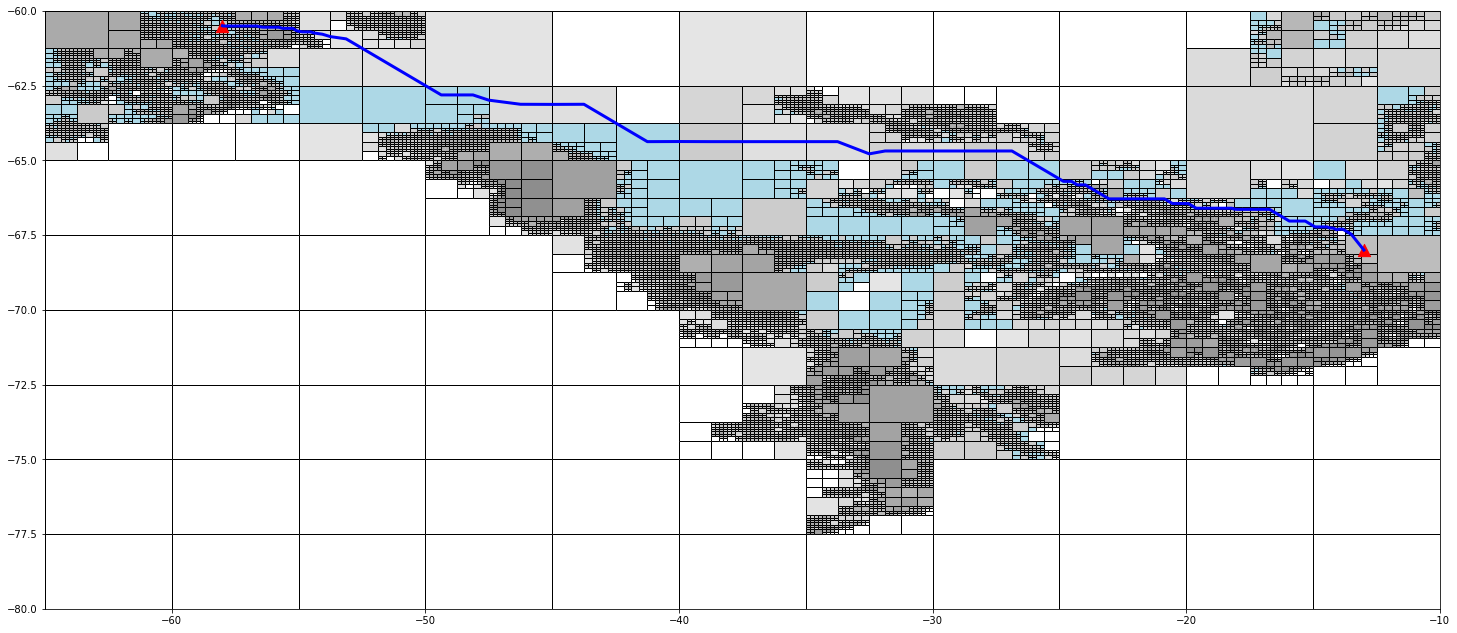

In [23]:
modis_grid.plot(waypoints=pd.read_csv(OptInfo['Route']['WayPoints']),paths=[Paths[0]])

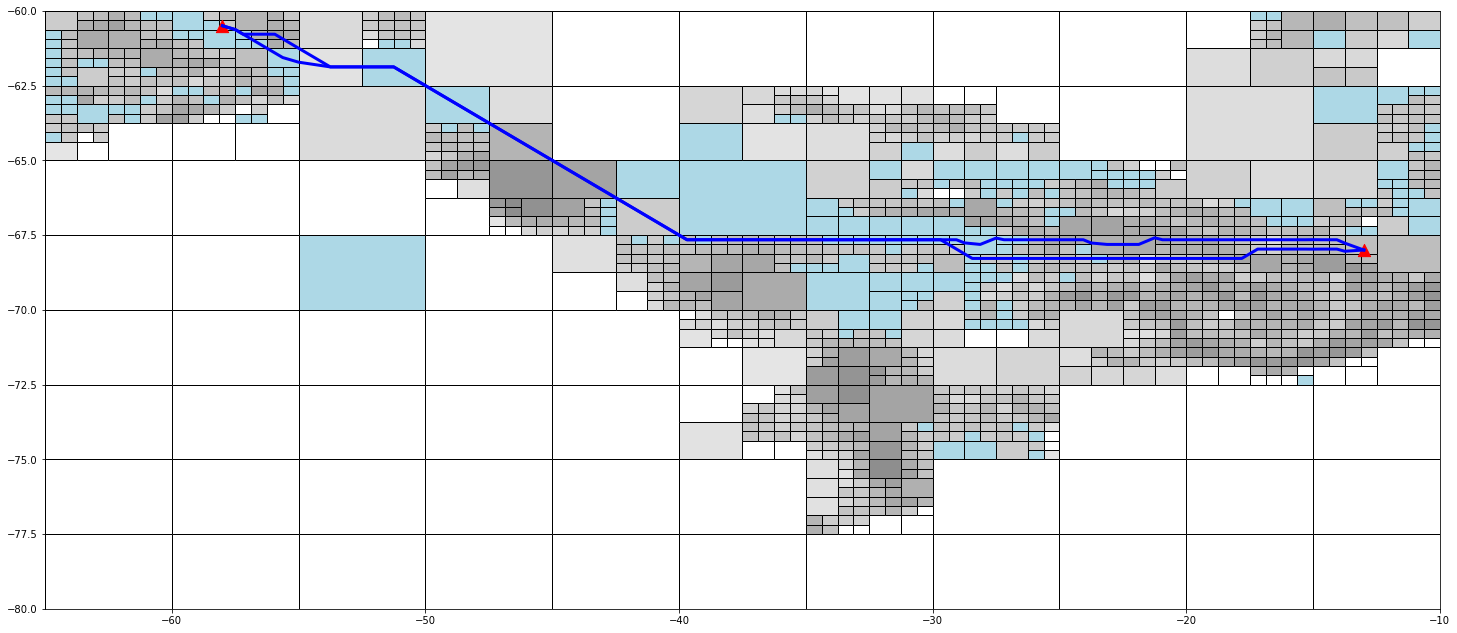

In [10]:
modis_grid.plot(waypoints=pd.read_csv(OptInfo['Route']['WayPoints']),paths=Paths)